In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from optuna import create_study
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Importando dados:
features = pd.read_csv("Features selecionadas para treino.csv")
features = features.drop("Unnamed: 0", axis=1)

target = pd.read_csv("Target para treino.csv")
target = target["Class"]
features = features.values

le = LabelEncoder()
target = le.fit_transform(target)

In [3]:
#Cross-validation:


In [4]:
X = pd.read_csv("Features selecionadas para teste.csv")
X = X.drop("Unnamed: 0", axis=1).values
y_pd = pd.read_csv("Target para teste.csv")
Y = y_pd["Class"]

nle = LabelEncoder()
y = nle.fit_transform(Y)
print(y)

[1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0]


['Impaired' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Impaired' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Impaired' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Impaired' 'Control' 'Impaired' 'Impaired'
 'Control' 'Control' 'Impaired' 'Impaired' 'Control' 'Control' 'Impaired'
 'Control' 'Impaired' 'Control' 'Impaired' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Impaired' 'Impaired' 'Impaired' 'Control'
 'Impaired' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Impaired' 'Impaired' 'Control' 'Control'
 'Control' 'Impaired' 'Impaired' 'Impaired' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control']


<Axes: >

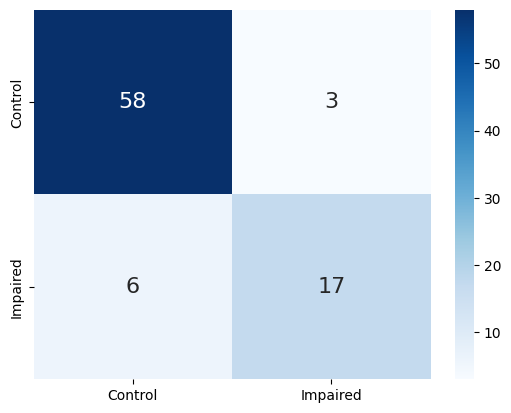

In [5]:
logRegressor = LogisticRegression(max_iter=1000, random_state=42)
logRegressor.fit(features, target)
y_pred = logRegressor.predict(X)
y_pred = nle.inverse_transform(y_pred)
classes = nle.classes_
print(y_pred)
c_matrix = confusion_matrix(Y, y_pred, labels=classes)

sns.heatmap(pd.DataFrame(c_matrix, classes, classes), annot=True, annot_kws={"size": 16}, cmap="Blues")

In [6]:
print(classification_report(Y, y_pred, target_names=classes))

              precision    recall  f1-score   support

     Control       0.91      0.95      0.93        61
    Impaired       0.85      0.74      0.79        23

    accuracy                           0.89        84
   macro avg       0.88      0.84      0.86        84
weighted avg       0.89      0.89      0.89        84



In [19]:
metrica = cross_val_score(
        logRegressor,
        X,
        y,
        scoring="recall",
        cv= 23
)
media = metrica.mean()
print("Recall médio no conjunto de teste:", media)

Recall médio no conjunto de teste: 0.6521739130434783
